In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 15
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925 }
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af
from analysis import stats
from analysis import exp_filepaths as ef

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Define filepaths from central filepath
ARCH_UNET = ef.ARCH_UNET
ARCH_SEGNET = ef.ARCH_SEGNET
ARCH_DEEPLAB = ef.ARCH_DEEPLAB

# loss functions experiments
LOSS_DSC = ef.LOSS_DSC
LOSS_WCE = ef.LOSS_WCE
LOSS_BCE = ef.LOSS_BCE
LOSS_FOCAL = ef.LOSS_FOCAL

# augmentation experiments
AUG_YES = ef.AUG_YES
AUG_NO = ef.AUG_NO

# volumetric architecture experiments
VOLUME_2D = ef.VOLUME_2D
VOLUME_2_5D_3 = ef.VOLUME_2_5D_3
VOLUME_2_5D_5 = ef.VOLUME_2_5D_5
VOLUME_2_5D_7 = ef.VOLUME_2_5D_7
VOLUME_3D = ef.VOLUME_3D

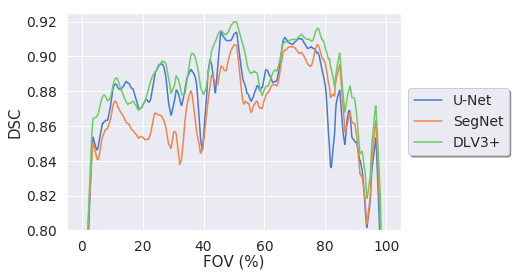

dsc
F-value: 5.2974
p-value: 0.0707

voe
F-value: 5.2974
p-value: 0.0707

cv
F-value: 0.4229
p-value: 0.8094

assd
F-value: 8.6100
p-value: 0.0135
Dunn: 


,U-Net,SegNet,DLV3+
U-Net,-1,1,0.0392294
SegNet,1,-1,0.0282352
DLV3+,0.0392294,0.0282352,-1



precision
F-value: 1.8454
p-value: 0.3974

recall
F-value: 3.5706
p-value: 0.1677



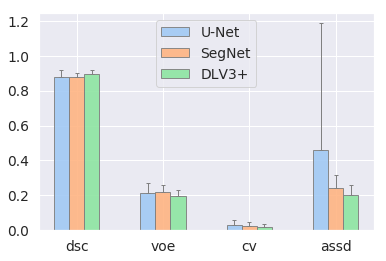

In [3]:
# Architecture result paths
ARCHS = {'filename': 'architecture',
         'keys': ['U-Net', 'SegNet', 'DLV3+'],
         'U-Net': ARCH_UNET, 'SegNet': ARCH_SEGNET, 'DLV3+': ARCH_DEEPLAB}
af.graph_slice_exp(ARCHS, True, title='', show_error=False, ylim=[0.8, 0.925])

stats.kruskal_dunn_analysis([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'])
stats.compare_metrics_v2([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'], 'stats-arch')

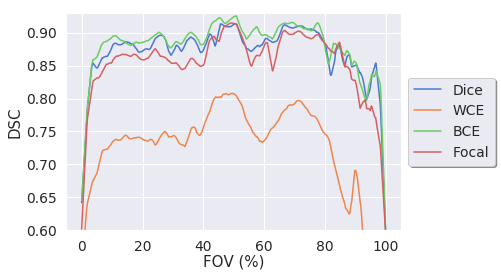

dsc
F-value: 66.1208
p-value: 0.0000
Dunn: 


,Dice,WCE,BCE,Focal
Dice,-1,3.07589e-10,1,1
WCE,3.07589e-10,-1,8.79816e-13,9.95168e-07
BCE,1,8.79816e-13,-1,0.18643
Focal,1,9.95168e-07,0.18643,-1



voe
F-value: 66.1208
p-value: 0.0000
Dunn: 


,Dice,WCE,BCE,Focal
Dice,-1,3.07589e-10,1,1
WCE,3.07589e-10,-1,8.79816e-13,9.95168e-07
BCE,1,8.79816e-13,-1,0.18643
Focal,1,9.95168e-07,0.18643,-1



cv
F-value: 62.6599
p-value: 0.0000
Dunn: 


,Dice,WCE,BCE,Focal
Dice,-1,3.2505e-10,1,1
WCE,3.2505e-10,-1,3.73704e-09,2.26763e-10
BCE,1,3.73704e-09,-1,1
Focal,1,2.26763e-10,1,-1



assd
F-value: 56.6041
p-value: 0.0000
Dunn: 


,Dice,WCE,BCE,Focal
Dice,-1,2.36757e-07,0.608919,1
WCE,2.36757e-07,-1,5.98103e-12,4.7416e-06
BCE,0.608919,5.98103e-12,-1,0.169764
Focal,1,4.7416e-06,0.169764,-1



precision
F-value: 67.2274
p-value: 0.0000
Dunn: 


,Dice,WCE,BCE,Focal
Dice,-1,1.45023e-10,1,0.941549
WCE,1.45023e-10,-1,7.30501e-13,8.51152e-07
BCE,1,7.30501e-13,-1,0.188366
Focal,0.941549,8.51152e-07,0.188366,-1



recall
F-value: 64.3548
p-value: 0.0000
Dunn: 


,Dice,WCE,BCE,Focal
Dice,-1,5.94039e-10,1,1
WCE,5.94039e-10,-1,5.27644e-08,5.80481e-12
BCE,1,5.27644e-08,-1,1
Focal,1,5.80481e-12,1,-1


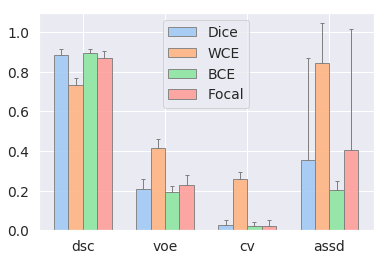

In [4]:
# Loss function result paths
LOSSES = {'filename': 'losses',
          'keys': ['Dice', 'WCE', 'BCE', 'Focal'],
          'Dice': LOSS_DSC, 'WCE': LOSS_WCE, 'BCE': LOSS_BCE, 'Focal': LOSS_FOCAL}
af.graph_slice_exp(LOSSES, True, title='', show_error=False, ylim=[0.60, 0.93])

stats.kruskal_dunn_analysis([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'])
stats.compare_metrics_v2([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'], 'stats-loss')

dsc
F-value: 19.8668
p-value: 0.0000
Dunn: 


,Non-Augmented,Augmented
Non-Augmented,-1,8.30294e-06
Augmented,8.30294e-06,-1



voe
F-value: 19.8668
p-value: 0.0000
Dunn: 


,Non-Augmented,Augmented
Non-Augmented,-1,8.30294e-06
Augmented,8.30294e-06,-1



cv
F-value: 8.7973
p-value: 0.0030
Dunn: 


,Non-Augmented,Augmented
Non-Augmented,-1,0.00301683
Augmented,0.00301683,-1



assd
F-value: 10.9570
p-value: 0.0009
Dunn: 


,Non-Augmented,Augmented
Non-Augmented,-1,0.000932489
Augmented,0.000932489,-1



precision
F-value: 1.7618
p-value: 0.1844

recall
F-value: 17.7360
p-value: 0.0000
Dunn: 


,Non-Augmented,Augmented
Non-Augmented,-1,2.53773e-05
Augmented,2.53773e-05,-1


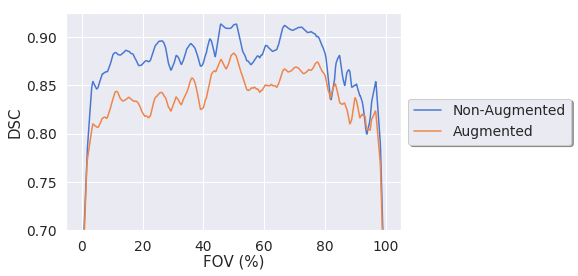

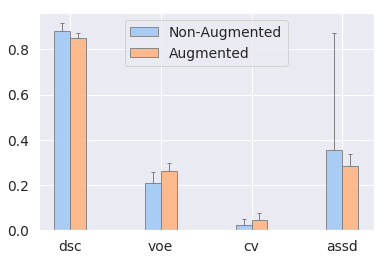

In [5]:
# Augmentation results
# Augmentation result paths
AUGS = {'filename': 'augment',
        'keys': ['Non-Augmented', 'Augmented'],
        'Augmented': AUG_YES, 'Non-Augmented': AUG_NO}

af.graph_slice_exp(AUGS, title='', show_error=False, ylim=[0.70, 0.925])

stats.kruskal_dunn_analysis([AUG_NO, AUG_YES], AUGS['keys'])
stats.compare_metrics_v2([AUG_NO, AUG_YES], AUGS['keys'], 'stats-aug')

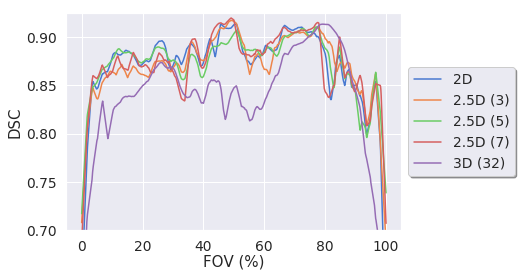

KeyError: 'cv'

In [6]:
# TODO: inspect training/testing

VOLUMES = {'filename': 'volume',
         'keys': ['2D', '2.5D (3)', '2.5D (5)', '2.5D (7)', '3D (32)'],
         '2D': VOLUME_2D, '2.5D (3)': VOLUME_2_5D_3, '2.5D (5)': VOLUME_2_5D_5, '2.5D (7)': VOLUME_2_5D_7, '3D (32)': VOLUME_3D}

af.graph_slice_exp(VOLUMES, True, title='', show_error=False, ylim=[0.70, 0.925])
stats.kruskal_dunn_analysis([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D], VOLUMES['keys'])
stats.compare_metrics_v2([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D], VOLUMES['keys'], 'stats-volume')

stats.kruskal_dunn_analysis([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7], ['2D', '2.5D (3)', '2.5D (5)', '2.5D (7)'])

In [7]:
# print metrics summary
af.print_metrics_summary([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB])
af.print_metrics_summary([LOSS_DSC, LOSS_BCE, LOSS_WCE, LOSS_FOCAL])
af.print_metrics_summary([AUG_NO, AUG_YES])
af.print_metrics_summary([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D])


/bmrNAS/people/arjun/msk_seg_networks/augment_limited/unet_2d/2018-11-07-16-05-15/fine_tune/test_results
--------------------------------------------------------------------------------
DSC - Mean +/- Std, Median = 0.8791 +/- 0.039, 0.8947
VOE - Mean +/- Std, Median = 0.2136 +/- 0.059, 0.1906
ASSD (mm) - Mean +/- Std, Median = 0.4583 +/- 0.728, 0.2232
Precision - Mean +/- Std, Median = 0.8787 +/- 0.063, 0.8974
Recall - Mean +/- Std, Median = 0.8827 +/- 0.035, 0.8904

/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/segnet_2d/2018-11-30-21-13-14/fine_tune/test_results
--------------------------------------------------------------------------------
DSC - Mean +/- Std, Median = 0.8773 +/- 0.026, 0.8815
VOE - Mean +/- Std, Median = 0.2176 +/- 0.040, 0.2118
ASSD (mm) - Mean +/- Std, Median = 0.2449 +/- 0.069, 0.2291
Precision - Mean +/- Std, Median = 0.8788 +/- 0.040, 0.8850
Recall - Mean +/- Std, Median = 0.8777 +/- 0.034, 0.8832

/bmrNAS/people/arjun/msk_seg_networks/architecture